<center><h1>Making Choropleth Maps Using Python and R</h1></center>

This example assumes we will load data from an Excel file.  We will handle the data processing and merging using Python pandas, then toss the actual making of the choropleth map to R's choroplethr package.

### Load the extension that allows us to use R

In [1]:
# load the rpy2 extension
%load_ext rpy2.ipython

### Import pandas package and create a state name to state code table

In [2]:
import pandas as pd

d = {'STATE_NAME':[
     'alabama',
     'alaska',
     'arkansas',
     'arizona',
     'california',
     'colorado',
     'connecticut',
     'delaware',
     'florida',
     'georgia',
     'hawaii',
     'iowa',
     'idaho',
     'illinois',
     'indiana',
     'kansas',
     'kentucky',
     'louisiana',
     'maine',
     'massachusetts',
     'maryland',
     'michigan',
     'minnesota',
     'missouri',
     'mississippi',
     'montana',
     'north carolina',
     'north dakota',
     'nebraska',
     'new hampshire',
     'new jersey',
     'new mexico',
     'nevada',
     'new york',
     'ohio',
     'oklahoma',
     'oregon',
     'pennsylvania',
     'rhode island',
     'south carolina',
     'south dakota',
     'tennessee',
     'texas',
     'utah',
     'virginia',
     'vermont',
     'washington',
     'wisconsin',
     'west virginia',
     'wyoming'],
     
     'STATE_CODE':[
     'AL',
     'AK',
     'AR',
     'AZ',
     'CA',
     'CO',
     'CT',
     'DE',
     'FL',
     'GA',
     'HI',
     'IA',
     'ID',
     'IL',
     'IN',
     'KS',
     'KY',
     'LA',
     'ME',
     'MA',
     'MD',
     'MI',
     'MN',
     'MO',
     'MS',
     'MT',
     'NC',
     'ND',
     'NE',
     'NH',
     'NJ',
     'NM',
     'NV',
     'NY',
     'OH',
     'OK',
     'OR',
     'PA',
     'RI',
     'SC',
     'SD',
     'TN',
     'TX',
     'UT',
     'VA',
     'VT',
     'WA',
     'WI',
     'WV',
     'WY']
    }

state_code_table = pd.DataFrame(d)
state_code_table

,STATE_CODE,STATE_NAME
0,AL,alabama
1,AK,alaska
2,AR,arkansas
3,AZ,arizona
4,CA,california
5,CO,colorado
6,CT,connecticut
7,DE,delaware
8,FL,florida
9,GA,georgia


In [3]:
df = pd.read_excel(r'D:\jupyter\miar\92Ki\HNA-MIAR-150429-01\13G_RDX_TPMS_Sensor_Leaks.xlsx', 'State_Defect_Rates')

In [4]:
df.head()

,STATE_CODE,2011 RDX MAP U.S.A.,2012 RDX MAP U.S.A.,2013 RDX ELP U.S.A.,2014 RDX ELP U.S.A.
0,AB,0,0,0.000000,0
1,AK,0,0,0.000000,0
2,AL,0,0,0.000000,0
3,AR,0,0,0.000000,0
4,AZ,0,0,0.122249,0


In [6]:
states_data = pd.merge(state_code_table, df, how='left', left_on='STATE_CODE', right_on='STATE_CODE')

In [7]:
states_data.head()

,STATE_CODE,STATE_NAME,2011 RDX MAP U.S.A.,2012 RDX MAP U.S.A.,2013 RDX ELP U.S.A.,2014 RDX ELP U.S.A.
0,AL,alabama,0.000000,0,0.000000,0.000000
1,AK,alaska,0.000000,0,0.000000,0.000000
2,AR,arkansas,0.000000,0,0.000000,0.000000
3,AZ,arizona,0.000000,0,0.122249,0.000000
4,CA,california,0.050556,0,0.032352,0.048131


In [8]:
states_data = states_data.fillna(value=0)
states_data

,STATE_CODE,STATE_NAME,2011 RDX MAP U.S.A.,2012 RDX MAP U.S.A.,2013 RDX ELP U.S.A.,2014 RDX ELP U.S.A.
0,AL,alabama,0.000000,0.000000,0.000000,0.000000
1,AK,alaska,0.000000,0.000000,0.000000,0.000000
2,AR,arkansas,0.000000,0.000000,0.000000,0.000000
3,AZ,arizona,0.000000,0.000000,0.122249,0.000000
4,CA,california,0.050556,0.000000,0.032352,0.048131
5,CO,colorado,0.000000,0.000000,0.097182,0.000000
6,CT,connecticut,0.335570,0.000000,0.225989,0.116686
7,DE,delaware,0.000000,0.000000,0.000000,0.000000
8,FL,florida,0.000000,0.000000,0.000000,0.000000
9,GA,georgia,0.000000,0.000000,0.075358,0.000000


In [9]:
states_data.drop('STATE_CODE', axis='columns', inplace=True)
states_data

,STATE_NAME,2011 RDX MAP U.S.A.,2012 RDX MAP U.S.A.,2013 RDX ELP U.S.A.,2014 RDX ELP U.S.A.
0,alabama,0.000000,0.000000,0.000000,0.000000
1,alaska,0.000000,0.000000,0.000000,0.000000
2,arkansas,0.000000,0.000000,0.000000,0.000000
3,arizona,0.000000,0.000000,0.122249,0.000000
4,california,0.050556,0.000000,0.032352,0.048131
5,colorado,0.000000,0.000000,0.097182,0.000000
6,connecticut,0.335570,0.000000,0.225989,0.116686
7,delaware,0.000000,0.000000,0.000000,0.000000
8,florida,0.000000,0.000000,0.000000,0.000000
9,georgia,0.000000,0.000000,0.075358,0.000000


### Pass the Pandas dataframe to R

In [10]:
%R -i states_data

### Create an array of Choropleth Maps

In [11]:
%%R
df <- as.data.frame(states_data)
library(choroplethr)

choropleths = list()
for (i in 2:ncol(states_data)) {
  df           = states_data[, c(1, i)]
  colnames(df) = c("region", "value")
  title        = paste0(colnames(states_data)[i])
  choropleths[[i-1]] = state_choropleth(df, title=title, legend="Defect Rate (%)", buckets=7)
}

### Create the Individual Choropleth Map

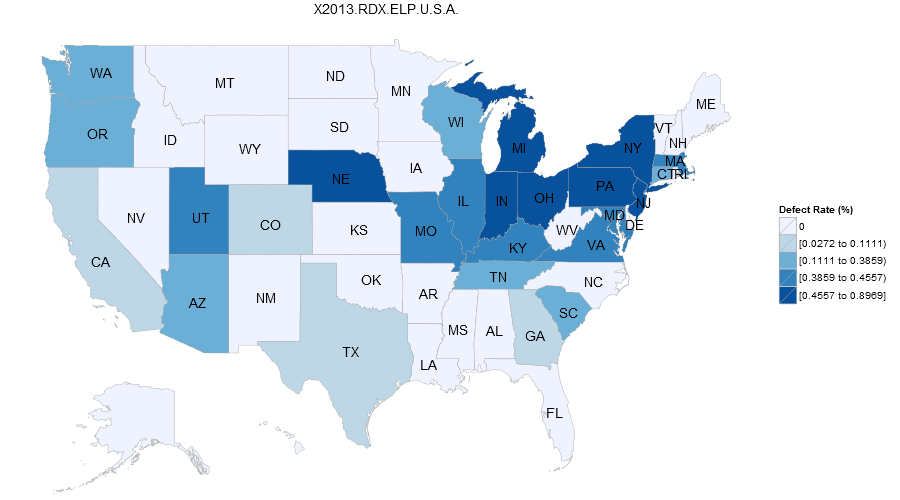

In [12]:
%%R -w 900 -h 500 -u px
choropleths[3]